In [22]:
import pandas as pd
df = pd.read_csv('Pokemon.csv')
deskriptif = df.describe()
print(deskriptif)

            number        total           hp       attack      defense  \
count  1072.000000  1072.000000  1072.000000  1072.000000  1072.000000   
mean    445.219216   440.885261    70.486940    80.938433    74.968284   
std     267.772806   121.379077    26.868039    32.463582    31.208059   
min       1.000000   175.000000     1.000000     5.000000     5.000000   
25%     209.750000   330.000000    50.000000    56.000000    52.000000   
50%     442.500000   460.500000    68.000000    80.000000    70.000000   
75%     681.250000   519.250000    84.000000   100.000000    90.000000   
max     898.000000  1125.000000   255.000000   190.000000   250.000000   

         sp_attack   sp_defense        speed   generation  
count  1072.000000  1072.000000  1072.000000  1072.000000  
mean     73.273321    72.476679    68.792910     4.294776  
std      32.643119    27.934253    30.076281     2.346472  
min      10.000000    20.000000     5.000000     0.000000  
25%      50.000000    50.000000  

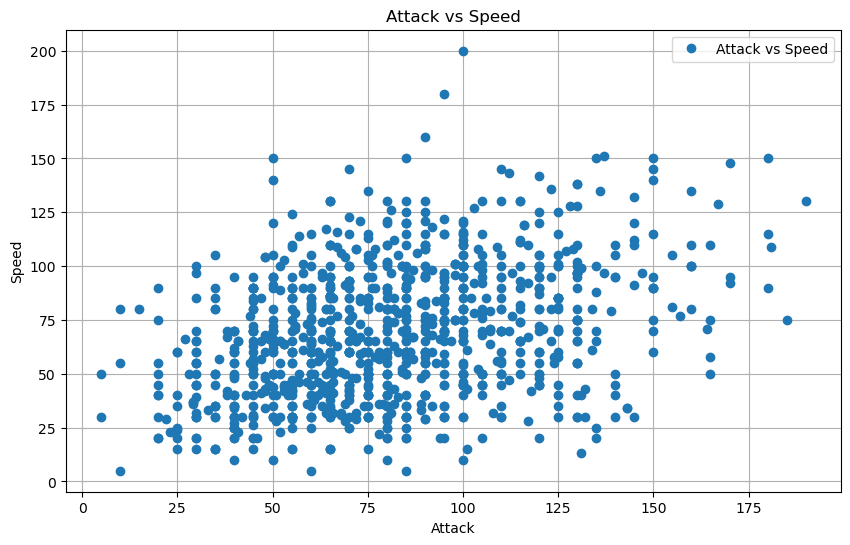

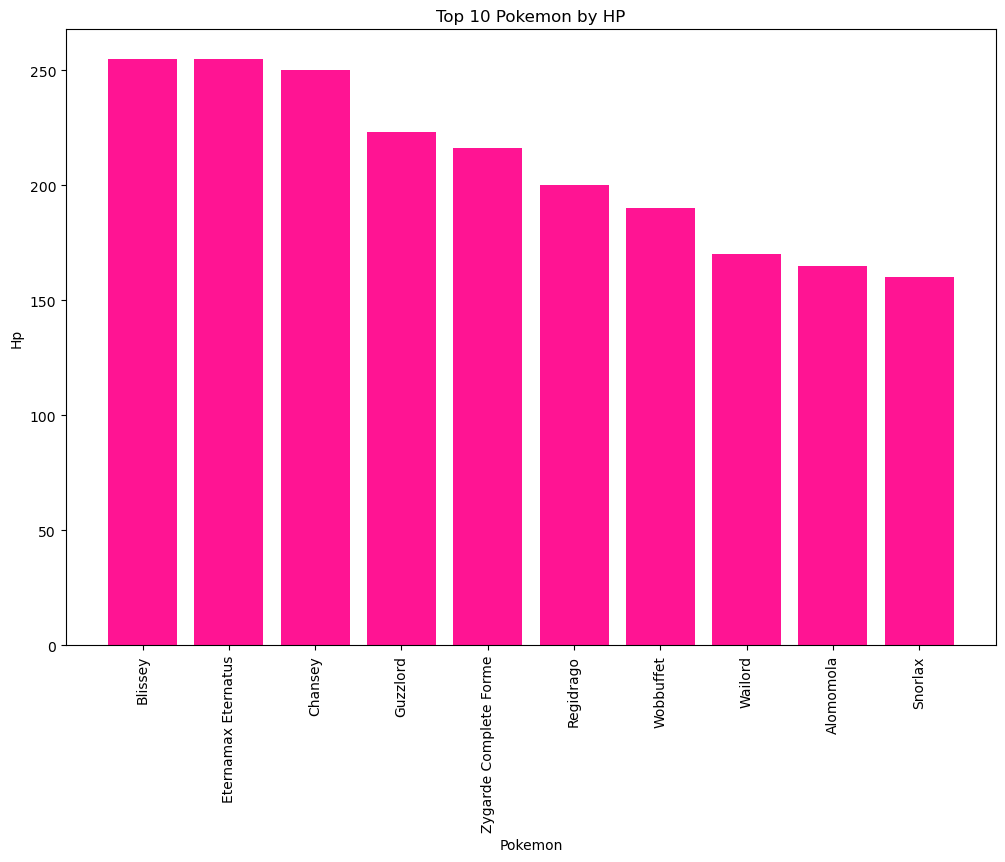

In [25]:
import matplotlib.pyplot as plt
# Line Plot
plt.figure(figsize=(10, 6))
plt.plot(df['attack'], df['speed'], 'o', label='Attack vs Speed')
plt.xlabel('Attack')
plt.ylabel('Speed')
plt.title('Attack vs Speed')
plt.legend()
plt.grid(True)
plt.show()

# Bar Plot (misalnya, total Generation of top 10 Pokemon)
top_10_pokemon = df.nlargest(10, 'hp')
plt.figure(figsize=(12, 8))
plt.bar(top_10_pokemon['name'], top_10_pokemon['hp'], color='deeppink')
plt.xlabel('Pokemon')
plt.ylabel('Hp')
plt.title('Top 10 Pokemon by HP')
plt.xticks(rotation=90)
plt.show()

In [27]:
# Hitung jumlah Pokémon per elemen
type_counts = df['type1'].value_counts().reset_index()
type_counts.columns = ['Element', 'Number of Pokémon']



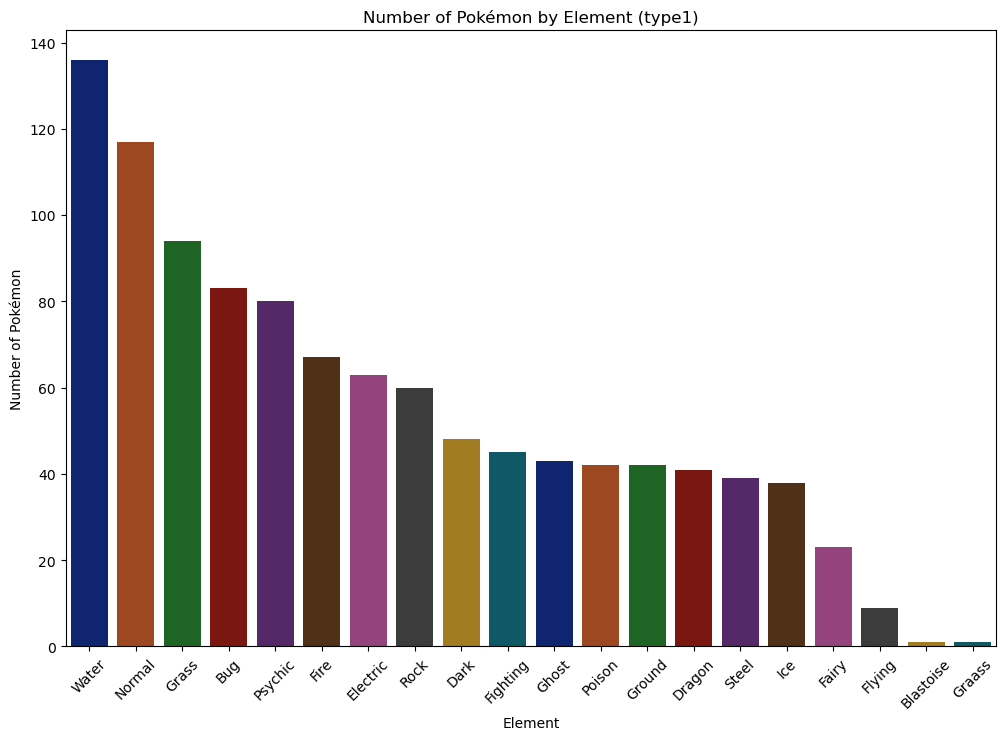

In [35]:
# Plot Bar dengan Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x='Element', y='Number of Pokémon', data=type_counts, palette='dark')
plt.xlabel('Element')
plt.ylabel('Number of Pokémon')
plt.title('Number of Pokémon by Element (type1)')
plt.xticks(rotation=45)
plt.show()

In [36]:
df.isna().sum()

number          0
name            0
type1           0
type2         498
total           0
hp              0
attack          0
defense         0
sp_attack       0
sp_defense      0
speed           0
generation      0
legendary       0
dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder

In [39]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number'])
categorical_cols = df.select_dtypes(include=['object'])

In [40]:
from sklearn.impute import KNNImputer

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=3)

#Fit the imputer on the dataset and transform it to fill missing values
imp_data = imputer.fit_transform(numerical_cols)

# Convert the result back to a DataFrame
df_imp = pd.DataFrame(imp_data, columns=numerical_cols.columns)
df_final = pd.concat([df_imp, categorical_cols], axis=1)

In [41]:
df_final.isna().sum()

number          0
total           0
hp              0
attack          0
defense         0
sp_attack       0
sp_defense      0
speed           0
generation      0
name            0
type1           0
type2         498
dtype: int64

In [42]:
# Encode categorical features
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_final['name'] = label_encoder.fit_transform(df['name'])
df_final['type1'] = label_encoder.fit_transform(df['type1'])
df_final['type2'] = label_encoder.fit_transform(df['type2'])
df_final['legendary'] = label_encoder.fit_transform(df['legendary'])

In [43]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   number      1072 non-null   float64
 1   total       1072 non-null   float64
 2   hp          1072 non-null   float64
 3   attack      1072 non-null   float64
 4   defense     1072 non-null   float64
 5   sp_attack   1072 non-null   float64
 6   sp_defense  1072 non-null   float64
 7   speed       1072 non-null   float64
 8   generation  1072 non-null   float64
 9   name        1072 non-null   int32  
 10  type1       1072 non-null   int32  
 11  type2       1072 non-null   int32  
 12  legendary   1072 non-null   int64  
dtypes: float64(9), int32(3), int64(1)
memory usage: 96.4 KB


In [44]:
df_select = df_final[['total',
                      'hp',
                      'attack',
                      'defense',
                      'sp_attack',
                      'sp_defense',
                      'speed',
                      'generation',
                      'legendary'
]]

In [45]:
# Separate
train_df = df_select.iloc[:964,:]
test_df = df_select.iloc[964:,:8]

In [46]:
x = train_df.drop('legendary', axis=1)
y = train_df['legendary'].astype('category').cat.codes

In [47]:
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=123)

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  # Import SVC

# Load or prepare your dataset here
# X_train, X_test, y_train, y_test = ...

# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Train Logistic Regression Classifier
logistic_model = LogisticRegression(random_state=42)  # Change to Logistic Regression
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Train SVC Classifier
svc_model = SVC(kernel='linear', random_state=42)  # Change to SVC
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

# Evaluate models
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_logistic)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print(f'Akurasi Decision Tree: {accuracy_dt}')
print(f'Akurasi Logistik {accuracy_rf}')
print(f'Akurasi SVC: {accuracy_svc}')

print("Laporan Klasifikasi Decision Tree:\n", classification_report(y_test, y_pred_dt))
print("Laporan Klasifikasi Logistik:\n", classification_report(y_test, y_pred_logistic))
print("Laporan Klasifikasi SVC:\n", classification_report(y_test, y_pred_svc))

c:\Users\intel\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Akurasi Decision Tree: 0.9689119170984456
Akurasi Logistik 0.9533678756476683
Akurasi SVC: 0.9689119170984456
Laporan Klasifikasi Decision Tree:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       171
           1       0.90      0.82      0.86        22

    accuracy                           0.97       193
   macro avg       0.94      0.90      0.92       193
weighted avg       0.97      0.97      0.97       193

Laporan Klasifikasi Logistik:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       171
           1       0.84      0.73      0.78        22

    accuracy                           0.95       193
   macro avg       0.90      0.85      0.88       193
weighted avg       0.95      0.95      0.95       193

Laporan Klasifikasi SVC:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       171
           1       0.94      0.77 

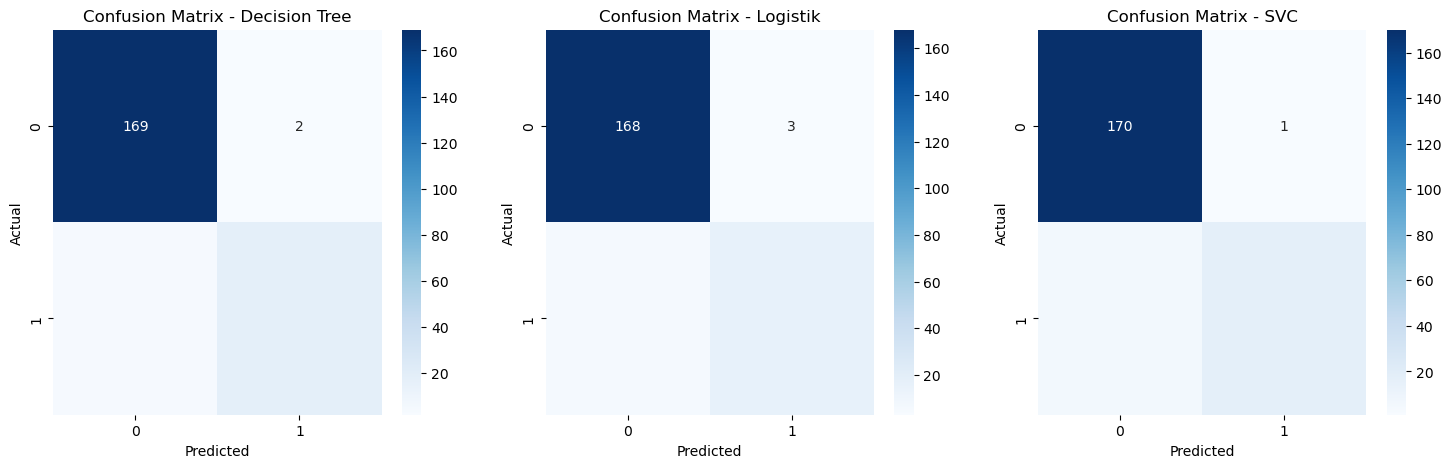

In [49]:
# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_lg = confusion_matrix(y_test, y_pred_logistic)
cm_svc = confusion_matrix(y_test, y_pred_svc)

# Plot confusion matrix
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(cm_dt, annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title('Confusion Matrix - Decision Tree')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_lg, annot=True, fmt='d', ax=ax[1], cmap='Blues')
ax[1].set_title('Confusion Matrix - Logistik')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

sns.heatmap(cm_svc, annot=True, fmt='d', ax=ax[2], cmap='Blues')
ax[2].set_title('Confusion Matrix - SVC')
ax[2].set_xlabel('Predicted')
ax[2].set_ylabel('Actual')

plt.show()

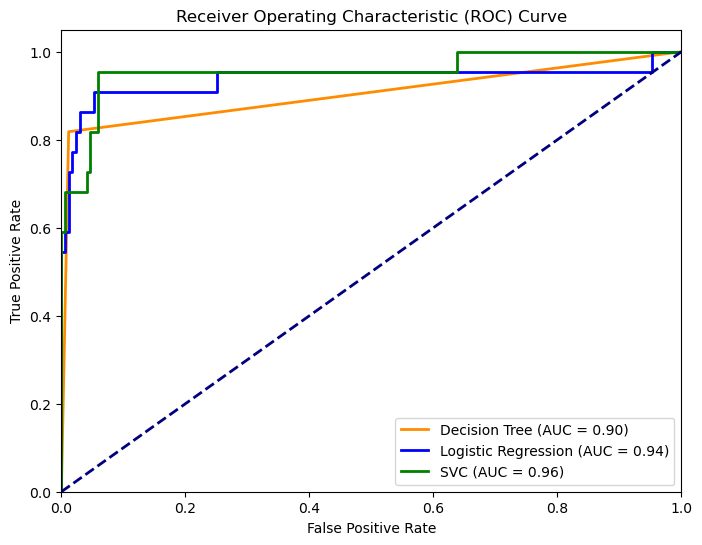

In [52]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

# Inisialisasi ulang model SVC dengan probability=True
svc_model = SVC(probability=True)

# Fit ulang model
svc_model.fit(X_train, y_train)

# Hitung nilai ROC curve dan AUC untuk SVC
fpr_svc, tpr_svc, _ = roc_curve(y_test, svc_model.predict_proba(X_test)[:,1])
roc_auc_svc = auc(fpr_svc, tpr_svc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})')
plt.plot(fpr_svc, tpr_svc, color='green', lw=2, label=f'SVC (AUC = {roc_auc_svc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
modelfix =SVC(kernel='linear', random_state=42)  # Change to SVC
modelfix.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
y_pred = modelfix.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       171
           1       0.94      0.77      0.85        22

    accuracy                           0.97       193
   macro avg       0.96      0.88      0.92       193
weighted avg       0.97      0.97      0.97       193



In [54]:
from sklearn.preprocessing import StandardScaler
import numpy as np
# Misalkan Anda memiliki DataFrame `df` dengan fitur-fitur yang perlu dinormalisasi
scaler = StandardScaler()
import numpy as np

input_data = (440, 70, 55, 65,  95, 85, 70,3)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1, -1)


prediction = modelfix.predict(input_data_reshape)
print(prediction)

if (prediction[0] == 0):
    print('Bukan Pokemon Lagendary')
else:
    print('Pokemon Legendary')

[0]
Bukan Pokemon Lagendary


c:\Users\intel\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [55]:
import pickle

In [56]:
filename = 'Pokemon_model.sav'
pickle.dump(modelfix,open(filename,'wb'))

In [57]:
import pickle
import streamlit as st
import numpy as np

# Membaca model
pokemon_model = pickle.load(open('Pokemon_model.sav','rb'))

# Judul web
st.title('Prediksi Pokemon')
# Input data dengan contoh angka valid untuk pengujian
Total = st.text_input('Total')
HP = st.text_input('HP')
Attack = st.text_input('Attack')
Defense = st.text_input('Defense')
SP_Attack = st.text_input('SP_Attack')
Sp_Defense = st.text_input('Sp_Defense')
Speed = st.text_input('Speed')
Generation = st.text_input('Generation')

prediksi_pokemon = ''

# Membuat tombol untuk prediksi
if st.button('Prediksi'):
    try:
        # Konversi input menjadi numerik
        inputs = np.array([[float(Total), float(HP), float(Attack), float(Defense),
                  float(SP_Attack), float(Sp_Defense), float(Speed), float(Generation)]])
        # Lakukan prediksi
        pokemon_prediksi = pokemon_model.predict(inputs)
        
        if pokemon_prediksi[0] == 1:
            prediksi_pokemon = 'Pokemon Lagendary'
            st.success(prediksi_pokemon)
        else:
            prediksi_pokemon = '<span style="color:red">Bukan Pokemon Lagendary</span>'
            st.markdown(prediksi_pokemon, unsafe_allow_html=True)
    except ValueError:
        st.error("Pastikan semua input diisi dengan angka yang valid.")
    except Exception as e:
        st.error(f"Terjadi kesalahan: {e}")

2024-07-25 21:27:16.427 
  command:

    streamlit run c:\Users\intel\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
